In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import seaborn as sns

# Canada housing data

### read in the dataset

In [44]:
housing_df_raw = pd.read_csv("hpi_data.csv")
housing_df = housing_df_raw.\
drop('Month-year', axis=1).\
rename(columns=lambda x: '_'.join(x.lower().split()).rstrip('_').replace(',', '').replace('-', '_'))
housing_df.head(-10)

,unnamed:_0,type,canada,atlantic_region,newfoundland_and_labrador,prince_edward_island,nova_scotia,new_brunswick,quebec,quebec_city_quebec,...,manitoba,saskatchewan,alberta,british_columbia,kelowna_british_columbia,vancouver_british_columbia,victoria_british_columbia,month_year,year,month
0,0,House and Land,38.2,NaN,NaN,NaN,NaN,NaN,NaN,30.1,...,NaN,NaN,NaN,NaN,NaN,90.5,128.7,1981-01-01,1981,1
1,1,House and Land,38.7,NaN,NaN,NaN,NaN,NaN,NaN,30.6,...,NaN,NaN,NaN,NaN,NaN,92.2,130.1,1981-02-01,1981,2
2,2,House and Land,39.3,NaN,NaN,NaN,NaN,NaN,NaN,30.6,...,NaN,NaN,NaN,NaN,NaN,92.2,130.8,1981-03-01,1981,3
3,3,House and Land,39.9,NaN,NaN,NaN,NaN,NaN,NaN,31.0,...,NaN,NaN,NaN,NaN,NaN,91.8,130.8,1981-04-01,1981,4
4,4,House and Land,40.6,NaN,NaN,NaN,NaN,NaN,NaN,31.4,...,NaN,NaN,NaN,NaN,NaN,91.8,132.5,1981-05-01,1981,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,1479,Land only,112.9,102.2,99.9,103.3,103.5,102.1,115.7,106.3,...,104.3,100.0,100.5,117.3,106.2,119.0,106.4,2021-04-01,2021,4
1480,1480,Land only,113.4,102.2,99.9,103.3,103.5,102.3,115.7,105.7,...,106.3,99.8,102.2,117.4,116.2,118.6,106.4,2021-05-01,2021,5
1481,1481,Land only,112.9,102.2,99.9,103.3,103.5,102.5,115.9,105.7,...,107.8,100.2,102.4,115.5,116.2,116.4,106.4,2021-06-01,2021,6
1482,1482,Land only,113.0,102.2,99.9,103.3,103.5,102.5,116.0,105.7,...,107.8,100.2,102.3,115.9,116.2,116.9,106.4,2021-07-01,2021,7


In [6]:
housing_df['type'].unique()

array(['House and Land', 'House only', 'Land only'], dtype=object)

# Victoria Analysis

In [7]:
victoria_df = housing_df[[
    'type', 
    'month_year', 
    'canada', 
    'british_columbia',
    'victoria_british_columbia'
]].copy().\
query("~british_columbia.isna()")


### House and Land

In [31]:
house_and_land_vic_df = victoria_df.copy().query("type == 'House and Land'").reset_index(drop=True)

house_and_land_vic_df['month_year'] = pd.to_datetime(house_and_land_vic_df['month_year'])

house_and_land_vic_df.head(-10)

,type,month_year,canada,british_columbia,victoria_british_columbia
0,House and Land,1986-01-01,39.8,66.3,92.6
1,House and Land,1986-02-01,40.3,66.4,92.9
2,House and Land,1986-03-01,40.6,66.4,93.2
3,House and Land,1986-04-01,40.8,66.8,92.7
4,House and Land,1986-05-01,41.1,67.1,92.7
...,...,...,...,...,...
423,House and Land,2021-04-01,114.4,118.9,112.4
424,House and Land,2021-05-01,116.0,120.0,112.7
425,House and Land,2021-06-01,116.7,119.7,113.0
426,House and Land,2021-07-01,117.2,120.3,114.3


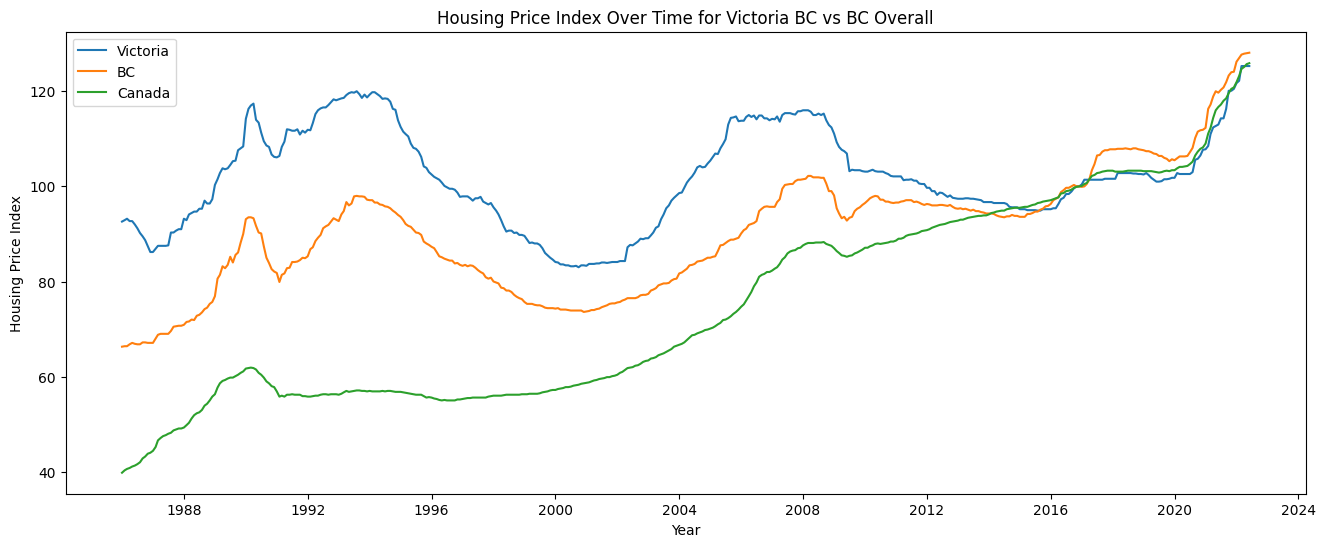

In [32]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(house_and_land_vic_df['month_year'], house_and_land_vic_df['victoria_british_columbia'], label = "Victoria")
ax.plot(house_and_land_vic_df['month_year'], house_and_land_vic_df['british_columbia'], label = "BC")
ax.plot(house_and_land_vic_df['month_year'], house_and_land_vic_df['canada'], label = "Canada")
ax.set_xlabel('Year')
ax.set_ylabel('Housing Price Index')
ax.set_title('Housing Price Index Over Time for Victoria BC vs BC Overall')
ax.legend()
plt.show()

### Correlation Coefficent for house and land

In [33]:
corr_victoria_to_bc = house_and_land_vic_df['victoria_british_columbia'].corr(house_and_land_vic_df['british_columbia'])
correlation_statement = f"strongly correlated with {corr_victoria_to_bc}" if corr_victoria_to_bc > 0.7 \
    else f"weakly correlated with {corr_victoria_to_bc}"
correlation_statement

'weakly correlated with 0.6421111174201675'

### Regression Plot

<Axes: xlabel='victoria_british_columbia', ylabel='british_columbia'>

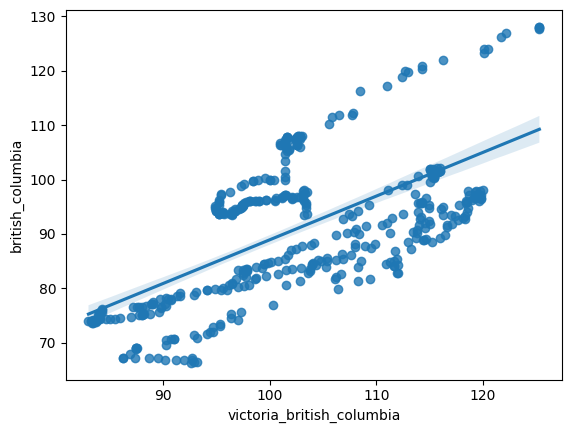

In [34]:
sns.regplot(x='victoria_british_columbia', y='british_columbia', data=house_and_land_vic_df)

### Pairplot

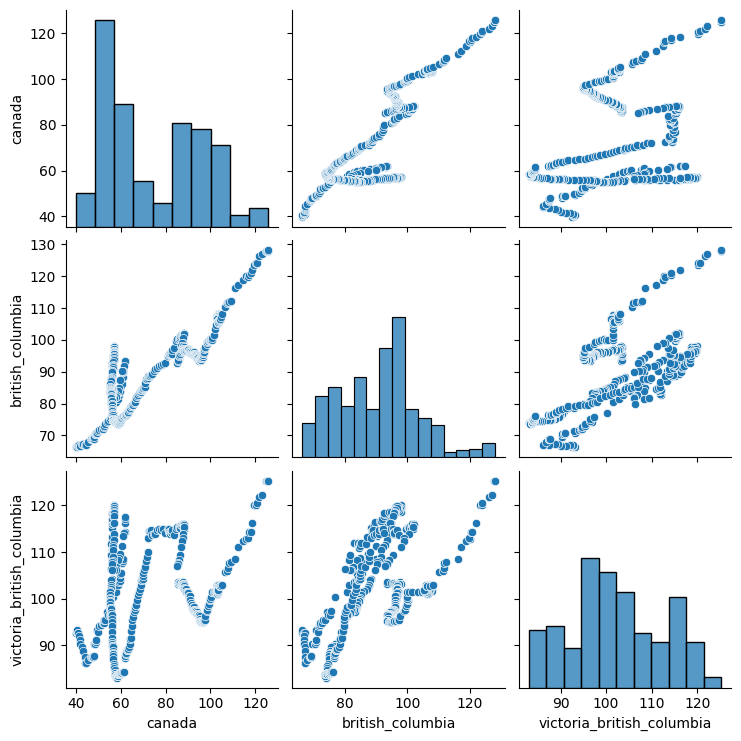

In [35]:
sns.pairplot(house_and_land_vic_df)

### Heatmap

C:\Users\xavie\AppData\Local\Temp\ipykernel_5144\440795999.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_and_land_vic_corr = house_and_land_vic_df.corr()


<Axes: >

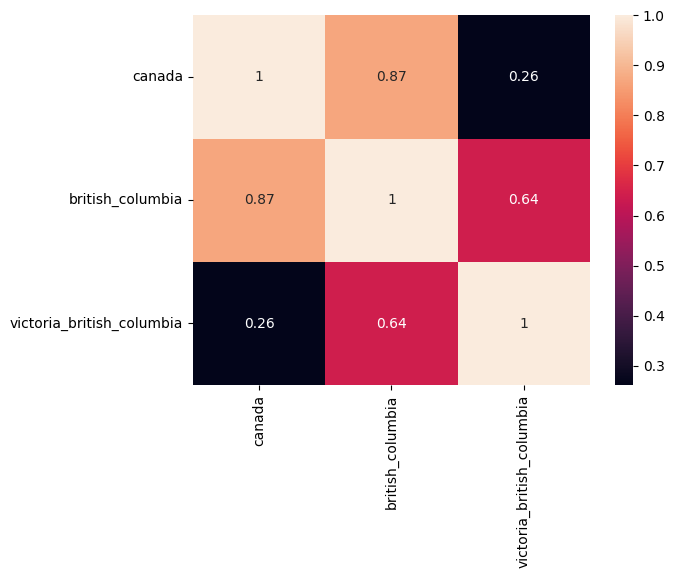

In [36]:
house_and_land_vic_corr = house_and_land_vic_df.corr()
sns.heatmap(house_and_land_vic_corr, annot=True)

### Local Maximum and Minimum

In [43]:
vic_hpi = house_and_land_vic_df['victoria_british_columbia']

min_months = argrelextrema(vic_hpi.values, np.less)
print(min_months)

best_months_vic = house_and_land_vic_df.loc[min_months]

best_months_vic.head(1000)


(array([ 25,  40,  60,  69,  71,  73,  83,  90,  93,  95, 101, 131, 136,
       142, 149, 152, 158, 177, 180, 188, 198, 202, 225, 231, 239, 244,
       246, 251, 253, 255, 261, 271, 282, 303, 316, 320, 396], dtype=int64),)


,type,month_year,canada,british_columbia,victoria_british_columbia
25,House and Land,1988-02-01,49.8,71.5,92.9
40,House and Land,1989-05-01,59.3,82.8,103.6
60,House and Land,1991-01-01,56.9,81.8,106.1
69,House and Land,1991-10-01,56.2,84.5,110.9
71,House and Land,1991-12-01,55.9,84.9,111.3
73,House and Land,1992-02-01,55.8,86.8,111.8
83,House and Land,1992-12-01,56.3,93.0,118.1
90,House and Land,1993-07-01,57.0,97.9,119.7
93,House and Land,1993-10-01,57.0,97.9,118.6
95,House and Land,1993-12-01,56.9,97.2,118.7
